<a href="https://colab.research.google.com/github/Harshra1-ultra/CNN/blob/main/chapter_1_deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


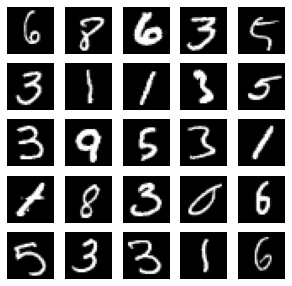

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image, cmap='gray')
  plt.axis('off')
plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

**The MNIST digit classifier**

multilayer precision (MLP) is using to train the model





In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist


In [ ]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255







**creating MLP model**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

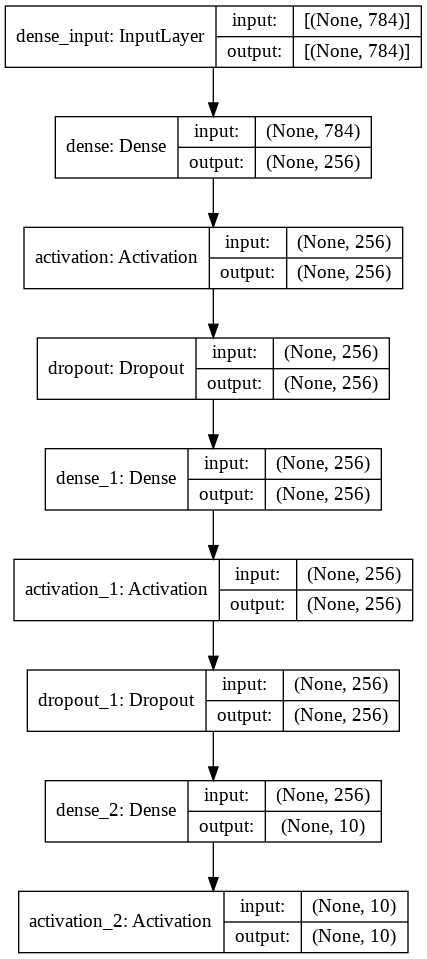

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45
# model is a 3-layer MLP with ReLU and dropout after each layer
# 1st layer 
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
#2nd layer 
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
#3rd layer 
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)


**using model to train data**

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.4243 - accuracy: 0.8712
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1939 - accuracy: 0.9417
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1499 - accuracy: 0.9552
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1299 - accuracy: 0.9619
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1111 - accuracy: 0.9665
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1030 - accuracy: 0.9682
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0950 - accuracy: 0.9702
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0878 - accuracy: 0.9729
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0815 - accuracy: 0.9745
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0772 - accuracy: 0.9756

**It gives us accuracy of 98.3%**

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

2

Using CNN

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [ ]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape , x_test.shape 

((60000, 28, 28, 1), (10000, 28, 28, 1))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)              

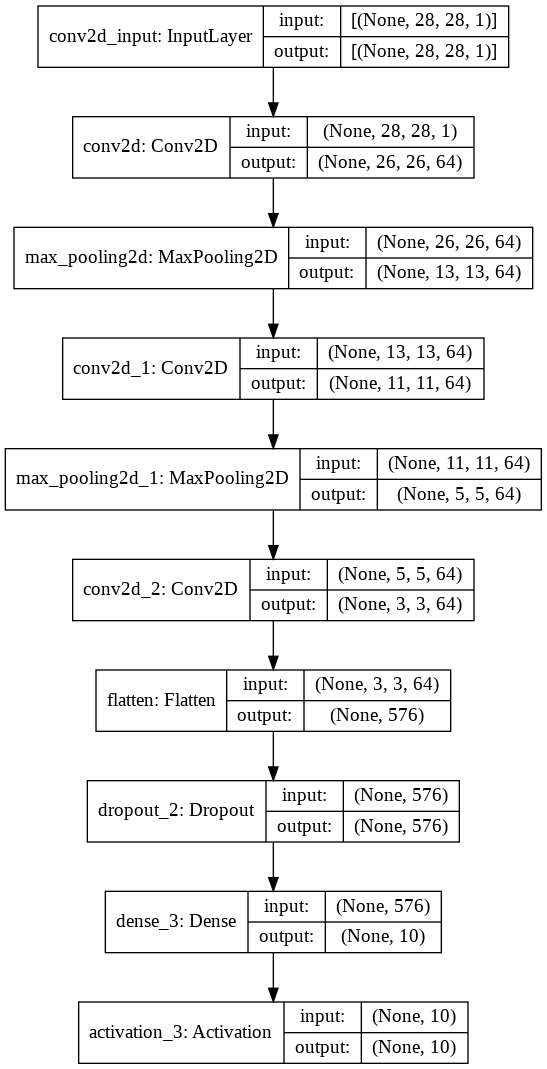

In [ ]:
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)


train model


In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                   verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 [==============================] - 70s 149ms/step - loss: 1.5218 - accuracy: 0.5608
Epoch 2/10
469/469 [==============================] - 70s 149ms/step - loss: 0.4244 - accuracy: 0.8722
Epoch 3/10
469/469 [==============================] - 70s 149ms/step - loss: 0.2948 - accuracy: 0.9111
Epoch 4/10
469/469 [==============================] - 70s 149ms/step - loss: 0.2292 - accuracy: 0.9304
Epoch 5/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1889 - accuracy: 0.9436
Epoch 6/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1633 - accuracy: 0.9508
Epoch 7/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1472 - accuracy: 0.9563
Epoch 8/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1340 - accuracy: 0.9596
Epoch 9/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1234 - accuracy: 0.9625
Epoch 10/10
469/469 [==============================] - 70s 150ms/step - l

In [ ]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import RMSprop

n_digits = 10
model = Sequential()
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu',
                 strides=2,
                 input_shape=(28, 28, 1),
                 padding='same'))
model.add(Conv2D(filters=128,
                 kernel_size=3,
                 activation='relu',
                 strides=2))
model.add(Flatten())
model.add(Dense(n_digits, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                46090     
Total params: 120,586
Trainable params: 120,586
Non-trainable params: 0
_________________________________________________________________


**using RNN**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [ ]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255



**RNN Model**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


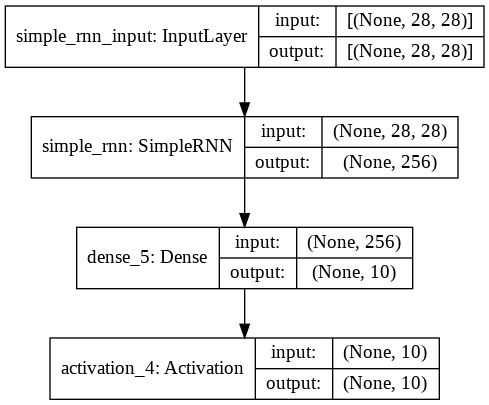

In [ ]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                       dropout=dropout,
                       input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [ ]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks

model.compile(loss='categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])
   # train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 28s 58ms/step - loss: 0.7524 - accuracy: 0.7847
Epoch 2/20
469/469 [==============================] - 27s 58ms/step - loss: 0.3291 - accuracy: 0.9027
Epoch 3/20
469/469 [==============================] - 27s 58ms/step - loss: 0.2434 - accuracy: 0.9259
Epoch 4/20
469/469 [==============================] - 27s 57ms/step - loss: 0.1993 - accuracy: 0.9392
Epoch 5/20
469/469 [==============================] - 27s 58ms/step - loss: 0.1727 - accuracy: 0.9477
Epoch 6/20
469/469 [==============================] - 27s 57ms/step - loss: 0.1530 - accuracy: 0.9543
Epoch 7/20
469/469 [==============================] - 27s 57ms/step - loss: 0.1386 - accuracy: 0.9585
Epoch 8/20
469/469 [==============================] - 27s 57ms/step - loss: 0.1287 - accuracy: 0.9619
Epoch 9/20
469/469 [==============================] - 27s 58ms/step - loss: 0.1212 - accuracy: 0.9637
Epoch 10/20
469/469 [==============================] - 27s 58ms/step - loss: 0.112

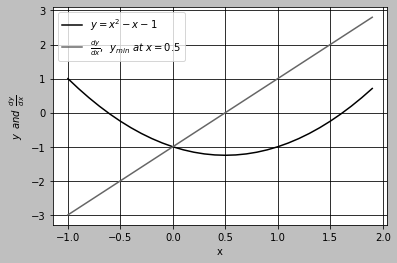

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('grayscale')
x = np.arange(-1, 2, 0.1)
c = [1, -1, -1]
d = [2, -1]
y = np.polyval(c, x)
z = np.polyval(d, x)
plt.xlabel('x')
plt.ylabel(r'$y\/\/\/and\/\/\/\frac{dy}{dx}$')
plt.plot(x, y, label=r'$y=x^2 -x -1$')
plt.plot(x, z, label=r'$\frac{dy}{dx},\/\/\/y_{min}\/\/at\/\/x=0.5$')
plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("sgd.png")
plt.show()
plt.close('all')


**SGD**

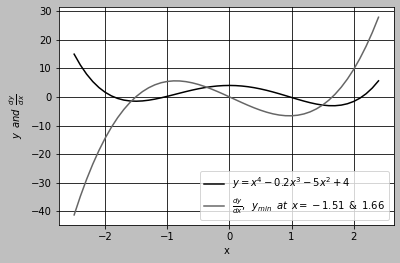

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('grayscale')
x = np.arange(-2.5, 2.5, 0.1)
c = [1, -0.2, -5, 0, 4]
d = [4, -0.6, -10, 0]
y = np.polyval(c, x)
z = np.polyval(d, x)
plt.xlabel('x')
plt.ylabel(r'$y\/\/\/and\/\/\/\frac{dy}{dx}$')
plt.plot(x, y, label=r'$y=x^4 -0.2x^3 -5x^2 +4$')
plt.plot(x, z, label=r'$\frac{dy}{dx},\/\/\/y_{min}\/\/\/at\/\/\/x=-1.51\/\/\/&\/\/\/1.66$')
plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("sgd-2-min.png")
plt.show()
plt.close('all')

**Linear model**

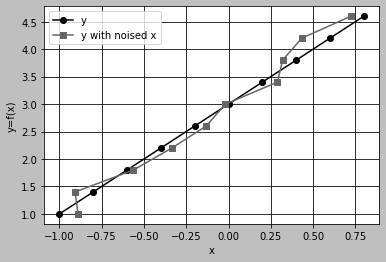

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

want_noise = True
# grayscale plot, comment if color is wanted
plt.style.use('grayscale')

# generate data bet -1,1 interval of 0.2
x = np.arange(-1,1,0.2)
y = 2*x + 3
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.plot(x, y, 'o-', label="y")

if want_noise:
    # generate data with uniform distribution
    noise = np.random.uniform(-0.2, 0.2, x.shape)
    xn = x + noise

    plt.ylabel('y=f(x)')
    plt.plot(xn, y, 's-', label="y with noised x")

plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("linear_regression.png")
plt.show()
plt.close('all')
